## Exercícios 8.2 8. da primeira lista

In [46]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

A = np.array([[0.4, 0.1, -0.2],
             [0.5, 0.8, 0.6],
             [1.5, -0.5, 1]])
B = np.array([[0.2], [0.3], [-0.2]])
C = np.array([[63, 12, 55]])

[53.70959193]


C:\Users\Pedro\AppData\Local\Temp\ipykernel_1136\3524625347.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y


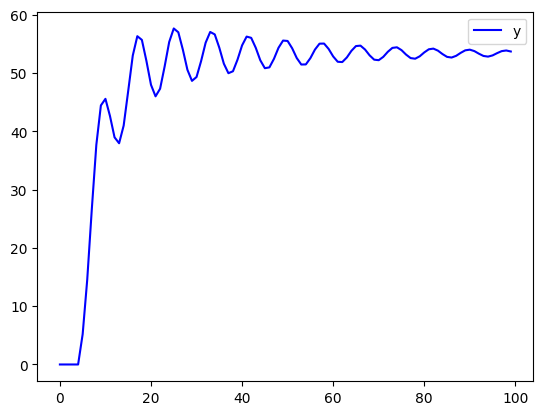

In [41]:
# 1. Simulação dos sistema com atraso de k=5
x = np.array([[0], [0], [0]]).flatten()
y= np.dot(C, x)

# Transição em degrau unitário em k=5
N = 100
u = np.zeros(N)
u[5:] = 1

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.show()

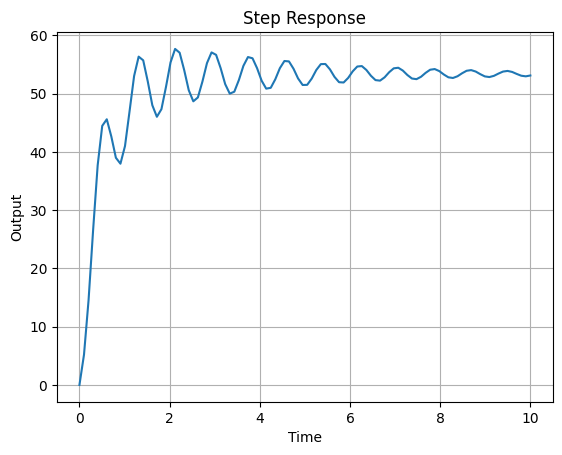

In [38]:

# 2. Simulação do sistema com a função step_response
t, y = ctl.step_response(ctl.ss(A, B, C, 0, True), T=np.linspace(0, 10, 100))
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid(True)

In [48]:
# 3. Matriz de controlabilidade
ctrb = B
for i in range(1, A.shape[0]):
    ctrb = np.hstack((ctrb, np.linalg.matrix_power(A, i) @ B))
print('Controlability matrix:\n', ctrb)
rank_of_controllability = matrix_rank(ctrb)
print('Rank of controlability matrix:', rank_of_controllability)


Controlability matrix:
 [[ 0.2    0.15   0.092]
 [ 0.3    0.22   0.221]
 [-0.2   -0.05   0.065]]
Rank of controlability matrix: 3


In [53]:
# 4. Polinomio característico
poly = np.poly(A)
print('Polinômio:', poly)

Polinômio: [ 1.   -2.2   2.07 -0.77]


In [54]:
#5. Polinômio com raízes lambda = 0.7, 0.8, 0.9
novo_poli = np.poly((0.7, 0.8, 0.9))
print('Polinômio:', novo_poli)

Polinômio: [ 1.    -2.4    1.91  -0.504]


In [61]:
#6. Fórmula de Ackerman manualmente para o cálculo de K para o sistema com polinômio característico desejado
K = np.array([[0, 0, 1]]) @ np.linalg.inv(ctrb) @ novo_poli[:-1]
K

array([-41.32636214])

In [59]:
#7. Fórmula de Ackerman para o cálculo de K para o sistema com polinômio característico desejado
K = ctl.acker(A, B, (0.7, 0.8, 0.9))
print('K:', K)

K: [[-8.02971932  1.74463401 -4.4127683 ]]


In [ ]:
# 8. Simulação do sistema com u = r - Kx e r sendo um sinal nulo de 1 <= K <= 5 e 0.06 de 6 <= K <= 100
x = np.array([[0], [0], [0]]).flatten()
y= np.dot(C, x)

# Transição em degrau unitário em k=5
N = 100
u = np.zeros(N)
u[5:] = 0.06 - 

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.show()